In [7]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')



group = np.array([[1, '2330.TW', 0.6448], [1, '2454.TW', -0.0386], [1, '2379.TW', -1.1308], [1, '3711.TW', 0.216], [1, '3034.TW', -0.1853], [1, '3259.TWO', 0.6691],
                  [1, '6223.TWO', 0.0747], [1, '3443.TW', 0.0521], [1, '5274.TWO', -0.0853], [1, '3035.TW', -0.0942], [1, '1216.TW', 0.1137], [1, '5508.TWO', 0.039],
                  [1, '2412.TW', -0.0187], [1, '1326.TW', 0.4483], [1, '1303.TW', 0.2952],
                  [2, 'CVX', 0.985796], [2, 'MSFT', 0.241721], [2, 'DIS', 1.146041], [2, 'PG', -0.435989], [2, 'TGT', -0.548373], [2, 'VST', 2.240081], [2, 'JNJ', -4.877368],
                  [2, 'TSM', 3.384505], [2, 'MCD', 0.842235], [2, 'GS', -0.602765], [2, 'NSIT', 0.989601], [2, 'ORCL', 0.332401], [2, 'F', 0.868596], [2, 'WMT', -0.644785],
                  [2, 'V', 0.121225], [2, 'SONY', -1.056396], [2, 'AMT', -0.056933], [2, 'TPL', -3.08367], [2, 'LLY', -0.185405], [2, 'BA', 1.339482],
                  [3, 'AVGO', 1.528955], [3, 'NVDA', 1.190034], [3, 'LRCX', 0.991454], [3, 'TSM', 0.105532], [3, 'AMKR', -0.011699], [3, 'QCOM', -0.227998], [3, 'ASML', -0.399155],
                  [3, 'AMD', -0.506331], [3, 'INTC', -0.767735], [3, 'AMAT', -0.903055],
                  [4, 'QLYS', 0.058], [4, 'AVGO', 0.2139], [4, 'GD', 0.2325], [4, 'NOC', 0.1237], [4, 'CSCO', 0.0659], [4, 'PANW', 0.094], [4, 'CRWD', 0.0834], [4, 'FTNT', 0.1134],
                  [4, 'ZS', 0.0066], [4, 'NET', 0.0086],
                  [5, 'AMZN', 0.25], [5, 'COST', 0.2], [5, 'NVDA', 0.2], [5, 'GLD', 0.15], [5, 'XOM', 0.15], [5, 'COIN', 0.1], [5, 'TAN', -0.05],
                  [6, 'BNTX', 0.06], [6, 'MRNA', -0.03], [6, 'ONCY', 0.02], [6, 'BGNE', 0.13], [6, 'AMRN', -0.08], [6, 'LLY', 0.23], [6, 'CRSP', 0.03], [6, 'VRTX', 0.13],
                  [6, 'NVO', 0.29], [6, 'UNH', 0.22],
                  [7, 'AAPL', 0.173958], [7, 'AMD', -0.094599], [7, 'AMGN', -0.091335], [7, 'AS', 0.06919], [7, 'ASML', -0.206803], [7, 'BA', -0.230662], [7, 'BX', 0.163425], [7, 'CMCSA', -0.132489],
                  [7, 'CVX', -0.232534], [7, 'DHR', -0.080782], [7, 'ES', -0.051464], [7, 'JNJ', -0.019161], [7, 'JPM', 0.169574], [7, 'LLY', -0.028566], [7, 'MTX', -0.108734], [7, 'NSIT', 0.036493],
                  [7, 'NVDA', 0.161269], [7, 'PANW', -0.035345], [7, 'PM', 0.270509], [7, 'T', 0.440278], [7, 'TGT', -0.059178], [7, 'TSM', 0.189124], [7, 'V', -0.269065], [7, 'VMC', 0.137016],
                  [7, 'VST', 0.083303], [7, 'VTR', 0.20825], [7, 'VZ', -0.264114], [7, 'WMT', 0.461929], [7, 'XOM', 0.340999]])

Groups = pd.DataFrame(group, columns=['Group', 'Ticker', 'Weight'])
Groups.Group = Groups.Group.astype(int)
Groups.Weight = Groups.Weight.astype(float)
Groups

,Group,Ticker,Weight
0,1,2330.TW,0.644800
1,1,2454.TW,-0.038600
2,1,2379.TW,-1.130800
3,1,3711.TW,0.216000
4,1,3034.TW,-0.185300
...,...,...,...
96,7,VST,0.083303
97,7,VTR,0.208250
98,7,VZ,-0.264114
99,7,WMT,0.461929


[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  29 of 29 completed


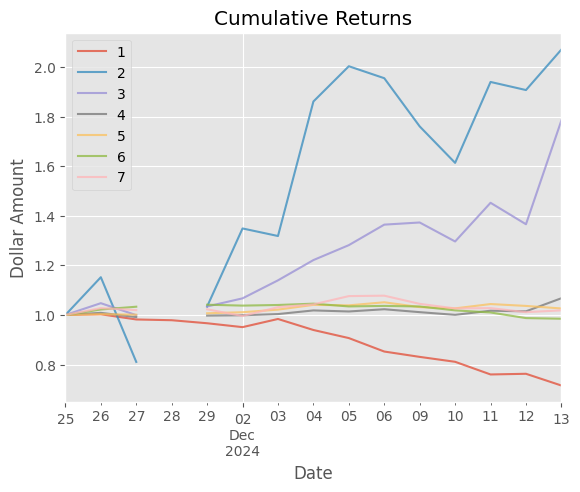

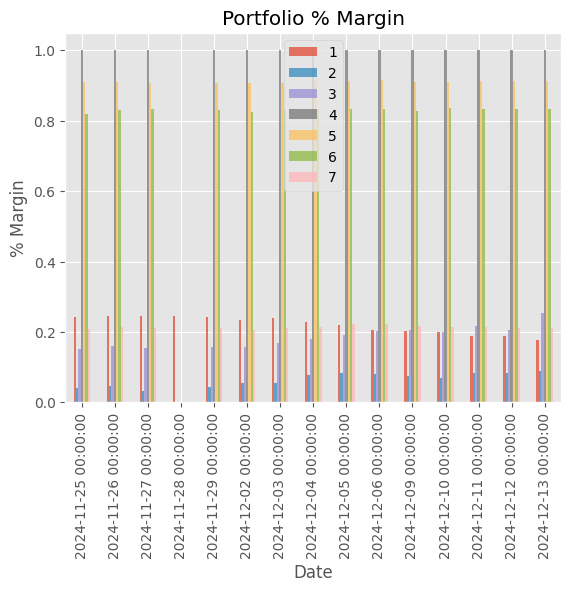

In [8]:
sret = pd.DataFrame(columns=range(1, 8))
spm = pd.DataFrame(columns=range(1, 8))

for i in range(1, 8):
#for i in [1]:
    tickers = list(Groups.loc[Groups.Group==i, 'Ticker'])
    weights = Groups.loc[Groups.Group==i, ['Weight']]
    weights.index = tickers
    weights = weights/weights['Weight'].sum()
    data = yf.download(tickers=tickers, interval="1d", start='2024-11-25')['Adj Close']
    cret = data/data.iloc[0,:]
    sret[i] = cret @ weights.loc[cret.columns]
    spm[i] = (cret @ weights.loc[cret.columns])['Weight']/(cret.mul(weights.loc[cret.columns].Weight).abs().sum(axis=1))
sret.plot(title='Cumulative Returns', ylabel='Dollar Amount', alpha=0.75)
spm.plot(kind='bar', title='Portfolio % Margin', ylabel='% Margin', alpha=0.75)
plt.show()

### dollar amount equity curve

In [9]:
sret

,1,2,3,4,5,6,7
Date,,,,,,,
2024-11-25,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-11-26,1.002849,1.152190,1.047505,1.008518,1.003325,1.021999,1.027680
2024-11-27,0.981844,0.810677,0.999201,0.991479,1.001121,1.033281,1.019435
2024-11-28,0.978803,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-29,0.966587,1.033969,1.034161,0.997429,1.006756,1.041272,1.022851
2024-12-02,0.950893,1.348820,1.066998,0.998764,1.011095,1.037718,0.995804
2024-12-03,0.983811,1.318336,1.139605,1.003578,1.021504,1.040234,1.031478
2024-12-04,0.939399,1.860729,1.221290,1.018313,1.040675,1.045551,1.042590
2024-12-05,0.906772,2.002914,1.281531,1.014065,1.038738,1.034390,1.076062


### SR & std 

In [10]:
Sharpe = pd.DataFrame(columns=sret.columns, index=['AvgRet', 'SD', 'Sharpe'])
for i in sret.columns:
  tmp = sret.loc[:,i].dropna().pct_change()
  Sharpe.loc['AvgRet', i] = tmp.mean()
  Sharpe.loc['SD', i] = tmp.std()
  Sharpe.loc['Sharpe', i] = Sharpe.loc['AvgRet', i]/Sharpe.loc['SD', i]
Sharpe

,1,2,3,4,5,6,7
AvgRet,-0.023252,0.074232,0.049205,0.005171,0.002043,-0.001117,0.001631
SD,0.02823,0.19355,0.094297,0.017362,0.010904,0.011626,0.021386
Sharpe,-0.823676,0.383527,0.521805,0.297852,0.187332,-0.096106,0.076244


### daily return 
- anlayze it it's stable 

In [12]:
# change the groupnum variable to extract the strategy return of the group that you are going to discuss
groupnum = 3
groupret = (sret.loc[:,groupnum]
            .dropna()
            .pct_change()
            .dropna())
groupret

Date
2024-11-26    0.047505
2024-11-27   -0.046114
2024-11-29    0.034988
2024-12-02    0.031753
2024-12-03    0.068048
2024-12-04    0.071678
2024-12-05    0.049326
2024-12-06    0.064520
2024-12-09    0.006352
2024-12-10   -0.055779
2024-12-11    0.120337
2024-12-12   -0.059573
2024-12-13    0.306621
Name: 3, dtype: float64

In [14]:

groupret.to_csv('groupret3.csv')
#files.download('groupret.csv')